# Univelcity Week 2 -  

## Carry out an exploratory analysis to glean out insights and trends in the dataset.

## Find a means to relate it with external data to help understand user behaviour. 
## Try to notice trends in what triggers transactions at certain times of the year, 
## what could be the possible cause of increased failed transactions… etc.

## Make a mini presentation with the use of the jupyter slides extension and hide the input cells of the selected pages of the slide.

# Title.


## An Exploratory Analysis of Transactions of XYZ bank for a one and half year period.

In [1]:
pip install RISE --quiet

Note: you may need to restart the kernel to use updated packages.


In [62]:
pip install --upgrade pip --quiet

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

In [151]:
# Converting the txn data into a dataframe and passing the multiple date columns into a single date column
tranx_data = pd.read_csv('txn_data.csv', parse_dates={"Dates":['txnYear', 'txnMonth', 'txnDay']})

In [152]:
# Create a tranx_ID column
tranx_data = tranx_data.rename(columns={'Unnamed: 0':'txnID'})
tranx_data.dtypes

Dates          object
txnID         float64
acct_no        object
status         object
no of txns      int64
dtype: object

In [153]:
# Discover missing values in dataset.
tranx_data.isnull().index

RangeIndex(start=0, stop=513248, step=1)

In [154]:
 # Remove missing values in dataset.
tranx_data = tranx_data.drop(tranx_data.index[[513247]])
tranx_data

,Dates,txnID,acct_no,status,no of txns
0,2019 10 29,0.0,1001192k,successful,1
1,2019 11 12,1.0,1001192k,failed,2
2,2019 11 18,2.0,1001192k,failed,1
3,2019 11 27,3.0,1001192k,successful,1
4,2019 12 8,4.0,1001192k,failed,1
...,...,...,...,...,...
513242,2020 10 15,513242.0,9999437n,successful,2
513243,2020 10 16,513243.0,9999437n,successful,1
513244,2020 10 21,513244.0,9999437n,successful,2
513245,2020 10 23,513245.0,9999437n,successful,2


In [288]:
# A sample of the dataset.
tranx_data.sample(10)

,Dates,txnID,acct_no,status,no of txns,year_month
491362,2019-12-24,491362.0,9633969j,successful,1,2019-12
41051,2020-07-28,41051.0,1751469r,successful,1,2020-07
465996,2020-09-16,465996.0,9213892k,successful,5,2020-09
437315,2020-10-12,437315.0,8617197s,successful,3,2020-10
467950,2020-07-19,467950.0,9244841j,successful,1,2020-07
252004,2020-09-14,252004.0,5340330j,successful,2,2020-09
152999,2020-10-18,152999.0,3625634j,successful,1,2020-10
347826,2019-07-12,347826.0,7055793n,successful,3,2019-07
254493,2020-09-23,254493.0,5378276q,successful,5,2020-09
161497,2020-11-02,161497.0,3779399q,successful,1,2020-11


# Total Volume of transactions across the review period is 1237429 transactions



In [155]:
# Total number of transactions carried out in 1.5 Years
tranx_data['no of txns'].sum()

1237429

In [156]:
# No Missing data in dataset
tranx_data.isnull().sum().sum()

0

In [159]:
tranx_data['Dates']

0         2019 10 29
1         2019 11 12
2         2019 11 18
3         2019 11 27
4          2019 12 8
             ...    
513242    2020 10 15
513243    2020 10 16
513244    2020 10 21
513245    2020 10 23
513246    2020 10 26
Name: Dates, Length: 513247, dtype: object

In [160]:
tranx_data['Dates'] = pd.to_datetime(tranx_data['Dates'])
tranx_data['year_month'] = tranx_data['Dates'].dt.strftime('%Y-%m')

In [161]:
tranx_data.head(10)

,Dates,txnID,acct_no,status,no of txns,year_month
0,2019-10-29,0.0,1001192k,successful,1,2019-10
1,2019-11-12,1.0,1001192k,failed,2,2019-11
2,2019-11-18,2.0,1001192k,failed,1,2019-11
3,2019-11-27,3.0,1001192k,successful,1,2019-11
4,2019-12-08,4.0,1001192k,failed,1,2019-12
5,2019-12-12,5.0,1001192k,successful,2,2019-12
6,2019-12-16,6.0,1001192k,successful,3,2019-12
7,2020-02-06,7.0,1001192k,successful,1,2020-02
8,2020-03-08,8.0,1001192k,successful,1,2020-03
9,2020-03-10,9.0,1001192k,successful,1,2020-03


In [162]:
sorted_tranx_data = tranx_data.sort_values(by='year_month' , ascending=True)

In [163]:
sorted_tranx_data.set_index("year_month")

,Dates,txnID,acct_no,status,no of txns
year_month,,,,,
2019-05,2019-05-28,262731.0,5558818j,successful,4
2019-05,2019-05-29,148783.0,3565135m,successful,1
2019-05,2019-05-28,63862.0,2076288n,successful,1
2019-05,2019-05-29,63863.0,2076288n,successful,2
2019-05,2019-05-30,63864.0,2076288n,successful,3
...,...,...,...,...,...
2020-11,2020-11-01,182284.0,4120306p,successful,1
2020-11,2020-11-02,182285.0,4120306p,successful,1
2020-11,2020-11-03,182286.0,4120306p,successful,1


In [164]:
tranx_metrics = sorted_tranx_data.drop(columns=['txnID']).groupby(['year_month']).sum()

In [295]:
avg_monthly_transc = tranx_metrics.mean()
avg_monthly_transc

no of txns    65127.842105
dtype: float64

# Question: Monthly Distribution - Total Volume of Transactions ?

### ---- To Understand our user behaviour.

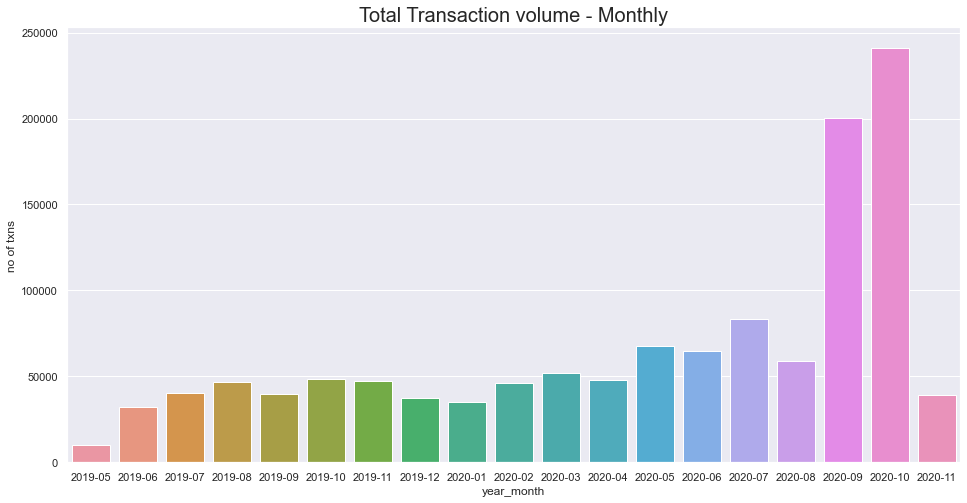

In [166]:
# Plot of the Volume of Transactions across the one and half years in Nigeria

plt.figure(figsize=(16,8))
plt.title('Total Transaction volume - Monthly', fontsize=20)
sns.set(style="darkgrid")
ax = sns.barplot(x=tranx_metrics.index, y=tranx_metrics['no of txns'], data=tranx_metrics)

# Insight:
### Transaction volume shows a significant increase in September 2020 and October 2020.                                          
### We can link this increase to the Nation-wide End SARS protest which began in October 2020.

# Question: 

# Which accounts performed the most transactions during the End SARS Period?

In [167]:
sept_oct_txn = sorted_tranx_data.set_index('year_month').loc['2020-09':'2020-10']
sept_oct_txn

,Dates,txnID,acct_no,status,no of txns
year_month,,,,,
2020-09,2020-09-08,424806.0,8422951r,successful,1
2020-09,2020-09-07,424805.0,8422951r,successful,1
2020-09,2020-09-14,388933.0,7844050q,successful,4
2020-09,2020-09-14,388932.0,7844050q,failed,1
2020-09,2020-09-29,4849.0,1105991s,successful,3
...,...,...,...,...,...
2020-10,2020-10-13,340441.0,6912156m,successful,4
2020-10,2020-10-15,340442.0,6912156m,successful,1
2020-10,2020-10-28,337326.0,6858725p,successful,2


In [168]:
sept_oct_acct_info = sept_oct_txn.drop(columns=['Dates', 'txnID', 'txnID', 'status']).groupby(['acct_no']).sum()
sept_oct_acct_info_sorted = sept_oct_acct_info.sort_values('no of txns',ascending=False)


# There was a total of 441175 transcations during the End SARS period.

###  -- An 85% increase from the average monthly transaction volume

In [169]:
total_txns = sept_oct_acct_info_sorted['no of txns'].sum()
total_txns

441175

In [308]:
percent_inc = ((total_txns - avg_monthly_transc)/total_txns*100).item()
print(f"There was an {round(percent_inc)}% from the average monthly transaction of {round(avg_monthly_transc.item())}")

There was an 85% from the average monthly transaction of 65128


In [170]:
sept_oct_acct_info_sorted

,no of txns
acct_no,
4203382q,19408
9850157q,6039
5843310m,3652
7502779o,3515
2029125q,2586
...,...
9272875r,1
7672316n,1
1968232p,1


In [287]:
sorted_data = sept_oct_acct_info_sorted.iloc[:20]


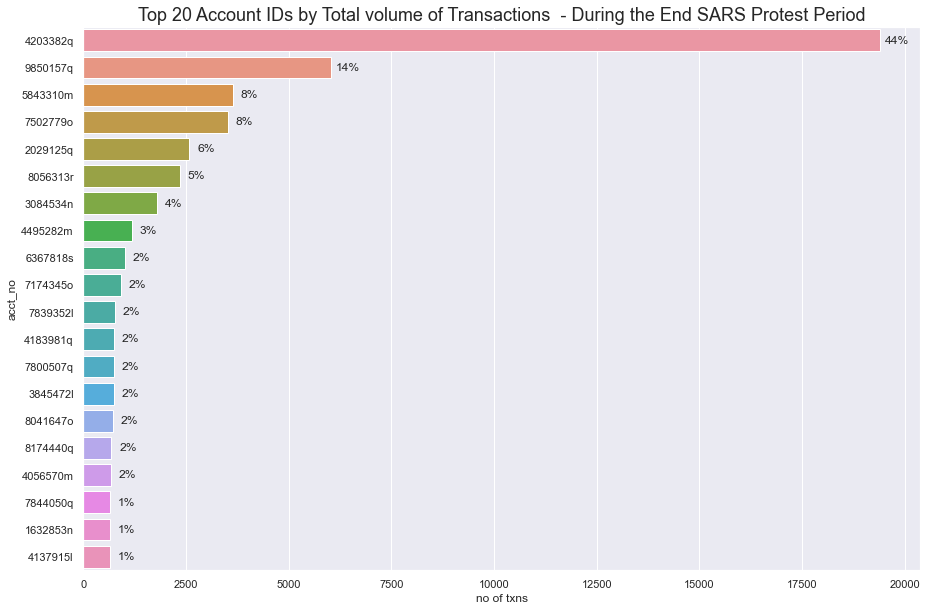

In [119]:
plt.figure(figsize=(15,10))
plt.title('Top 20 Account IDs by Total volume of Transactions  - During the End SARS Protest Period',fontsize=18)
sns.set(style="darkgrid")
ax = sns.barplot(x=sorted_data['no of txns'], y=sorted_data.index, data=sorted_data)

for p in ax.patches:
    percentage = f'{round(1000 * p.get_width()/total_txns)}%'
    x = p.get_width()
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x+400, y+0.1),ha='center')

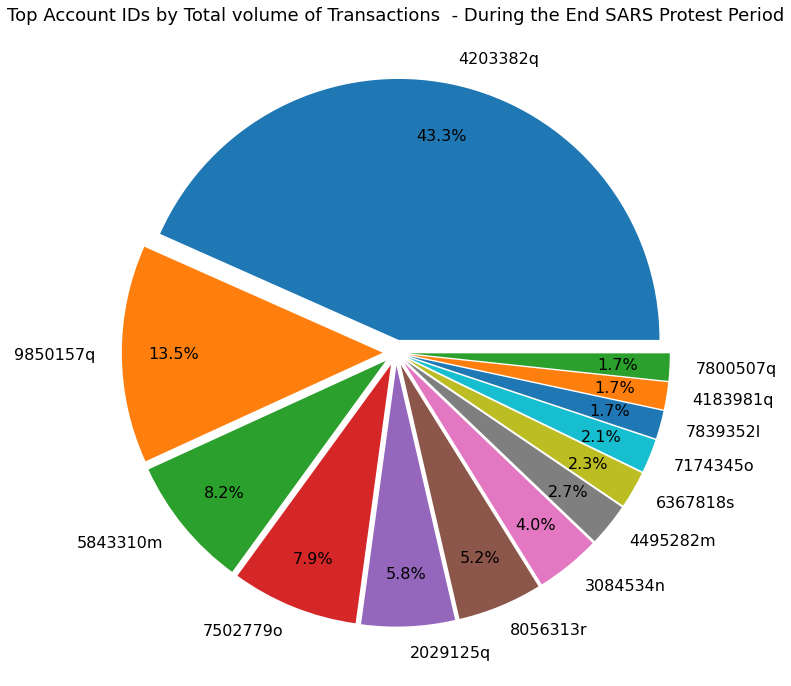

In [22]:
#Using matplotlib
pie, ax = plt.subplots(figsize=[20,12])
labels = sept_oct_acct_info_sorted.index[:13]
plt.pie(x=sept_oct_acct_info_sorted['no of txns'][:13], autopct="%.1f%%", explode=[0.05]*13, labels=labels, pctdistance=0.8,textprops={'fontsize': 16})
plt.title('Top Account IDs by Total volume of Transactions  - During the End SARS Protest Period', fontsize=18);
# pie.savefig("DeliveryPieChart.png")

# Insight:

## 4203382q Account ID made 44% of the transaction volume during this period.

## 9850157q Account ID made 14% of the transaction volume during this period.

## 5843310m Account ID made 8% of the transaction volume during this period.

# Question: What is the distribution of transactions status across weekdays

### -- To Discover the trend of transaction status with respect to time (weekdays) and users

In [172]:
sorted_tranx_data['weekday'] = pd.DatetimeIndex(sorted_tranx_data.Dates).weekday
sorted_tranx_data['month'] = pd.DatetimeIndex(sorted_tranx_data.Dates).month
sorted_tranx_data['year'] = pd.DatetimeIndex(sorted_tranx_data.Dates).year

In [173]:
sorted_tranx_data

,Dates,txnID,acct_no,status,no of txns,year_month,weekday,month,year
262731,2019-05-28,262731.0,5558818j,successful,4,2019-05,1,5,2019
148783,2019-05-29,148783.0,3565135m,successful,1,2019-05,2,5,2019
63862,2019-05-28,63862.0,2076288n,successful,1,2019-05,1,5,2019
63863,2019-05-29,63863.0,2076288n,successful,2,2019-05,2,5,2019
63864,2019-05-30,63864.0,2076288n,successful,3,2019-05,3,5,2019
...,...,...,...,...,...,...,...,...,...
182284,2020-11-01,182284.0,4120306p,successful,1,2020-11,6,11,2020
182285,2020-11-02,182285.0,4120306p,successful,1,2020-11,0,11,2020
182286,2020-11-03,182286.0,4120306p,successful,1,2020-11,1,11,2020
255963,2020-11-04,255963.0,5420849l,successful,2,2020-11,2,11,2020


In [174]:
weekday_tranx = sorted_tranx_data.drop(columns=['year', 'month', 'year_month', 'acct_no','Dates', 'txnID'])

In [175]:
weekday_tranx

,status,no of txns,weekday
262731,successful,4,1
148783,successful,1,2
63862,successful,1,1
63863,successful,2,2
63864,successful,3,3
...,...,...,...
182284,successful,1,6
182285,successful,1,0
182286,successful,1,1
255963,successful,2,2


In [177]:
weekday_tranx_pivot = pd.pivot_table(weekday_tranx, index=['weekday'], columns=['status'], values=['no of txns'], aggfunc='sum')

In [176]:
weekday_tranx_pivot

no of txns                                                
status     debited declined  failed initialized pending successful
weekday                                                           
0              3.0   2250.0  9155.0       357.0    37.0   192643.0
1             21.0   1610.0  7556.0       274.0    13.0   183564.0
2              9.0   2205.0  7198.0       257.0     7.0   181411.0
3              NaN   2013.0  6288.0       271.0     7.0   183198.0
4              3.0   1714.0  5512.0       151.0     NaN   172988.0
5              1.0   1725.0  6321.0       117.0     1.0   172456.0
6              NaN   1574.0  4209.0        39.0     NaN    90271.0

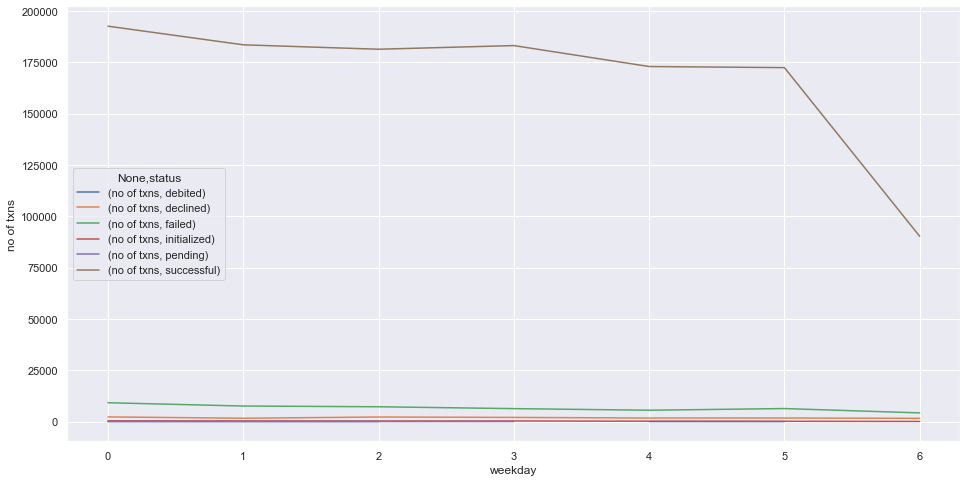

In [54]:
# Plot of the Volume of Transactions across the one and half years in Nigeria

# plt.figure(figsize=(16,8))
# plt.title('Total Transaction volume - Monthly', fontsize=20)
ax = weekday_tranx_pivot.plot(xticks=weekday_tranx_pivot.index, figsize=(16,8) )
ylab = ax.set_ylabel('no of txns')

# Insight:

## There is a significant drop in successful transactions on Sundays compared to other days.

## All other transaction status maintain near uniform volume through out the weekdays

# Question: How does transaction volume vary with weekdays ? 

### NB: September 2020 and October 2020 was exluded ( In other to show an unbiased user behaviour)

In [189]:
tranx_data_1 = tranx_data[tranx_data.year_month != '2020-09']
non_protest_tranx_data =  tranx_data_1[tranx_data_1.year_month != '2020-10']

In [190]:
non_protest_tranx_data

,Dates,txnID,acct_no,status,no of txns,year_month
0,2019-10-29,0.0,1001192k,successful,1,2019-10
1,2019-11-12,1.0,1001192k,failed,2,2019-11
2,2019-11-18,2.0,1001192k,failed,1,2019-11
3,2019-11-27,3.0,1001192k,successful,1,2019-11
4,2019-12-08,4.0,1001192k,failed,1,2019-12
...,...,...,...,...,...,...
513224,2020-07-20,513224.0,9999437n,successful,1,2020-07
513225,2020-07-26,513225.0,9999437n,declined,1,2020-07
513226,2020-07-26,513226.0,9999437n,successful,2,2020-07
513227,2020-08-03,513227.0,9999437n,successful,1,2020-08


In [220]:
non_protest_tranx_data['weekday'] = pd.DatetimeIndex(non_protest_tranx_data.Dates).weekday

<ipython-input-220-56c84f5e2ffe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_protest_tranx_data['weekday'] = pd.DatetimeIndex(non_protest_tranx_data.Dates).weekday


In [226]:

non_protest_tranx_data

,Dates,txnID,acct_no,status,no of txns,year_month,weekday
0,2019-10-29,0.0,1001192k,successful,1,2019-10,1
1,2019-11-12,1.0,1001192k,failed,2,2019-11,1
2,2019-11-18,2.0,1001192k,failed,1,2019-11,0
3,2019-11-27,3.0,1001192k,successful,1,2019-11,2
4,2019-12-08,4.0,1001192k,failed,1,2019-12,6
...,...,...,...,...,...,...,...
513224,2020-07-20,513224.0,9999437n,successful,1,2020-07,0
513225,2020-07-26,513225.0,9999437n,declined,1,2020-07,6
513226,2020-07-26,513226.0,9999437n,successful,2,2020-07,6
513227,2020-08-03,513227.0,9999437n,successful,1,2020-08,0


In [227]:
weekday_metrics = non_protest_tranx_data.drop(columns=['txnID']).groupby(['weekday']).sum()

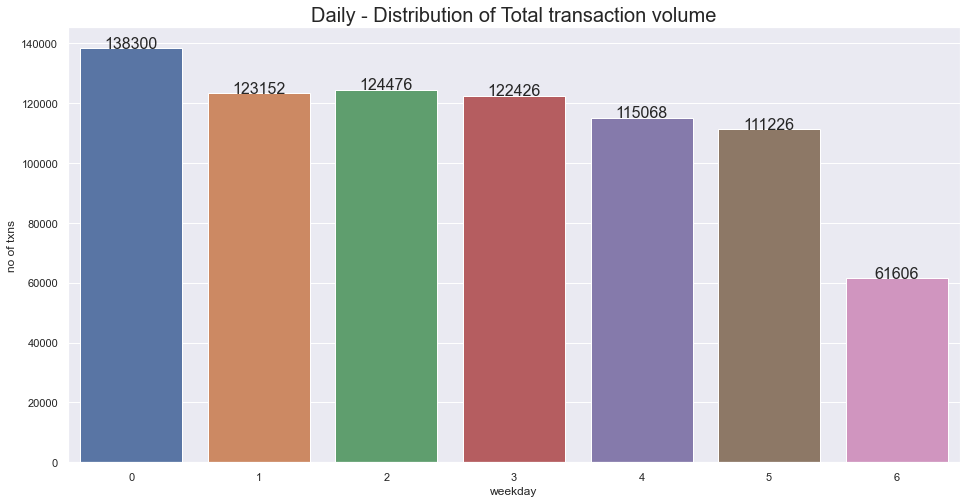

In [257]:
# Plot of the Volume of Transactions across the one and half years in Nigeria

plt.figure(figsize=(16,8))
plt.title('Daily - Distribution of Total transaction volume', fontsize=20)
sns.set(style="darkgrid")
ax = sns.barplot(x=weekday_metrics.index, y=weekday_metrics['no of txns'], data=weekday_metrics)

for rect in ax.patches:
    no_of_trnx = f'{round(rect.get_height())}'
    x = rect.get_x() + rect.get_width()/2
    y = rect.get_height()
    ax.annotate(no_of_trnx, (x, y),ha='center', fontsize=16)

In [228]:
weekday_metrics

,no of txns
weekday,
0,138300
1,123152
2,124476
3,122426
4,115068
5,111226
6,61606


# Insight:

## There is a drop in Transaction volume on sundays against other weekdays.

In [242]:
avg_daily_trans = weekday_metrics.mean()
print(f"Average daily tramsaction Volume is {round(avg_daily_trans.item())} transactions")
print(f"Subday tramsaction Volume is {round(weekday_metrics.loc[6].item())} transactions")

Average daily tramsaction Volume is 113751 transactions
Subday tramsaction Volume is 61606 transactions


# Question: What triggers Failed transactions on certain times of the year

In [260]:
sorted_daily_tranx_data = tranx_data.sort_values(by='Dates' , ascending=True)

In [279]:
failed_txn_data = sorted_daily_tranx_data[sorted_daily_tranx_data.status == 'failed']

In [263]:
sorted_daily_metric = sorted_daily_tranx_data.drop(columns=['txnID']).groupby(['Dates']).sum()

In [264]:
sorted_daily_metric

,no of txns
Dates,
2019-05-21,1028
2019-05-22,963
2019-05-23,1196
2019-05-24,1183
2019-05-25,1043
...,...
2020-11-01,4640
2020-11-02,9200
2020-11-03,8816


<AxesSubplot:xlabel='no of txns', ylabel='Dates'>

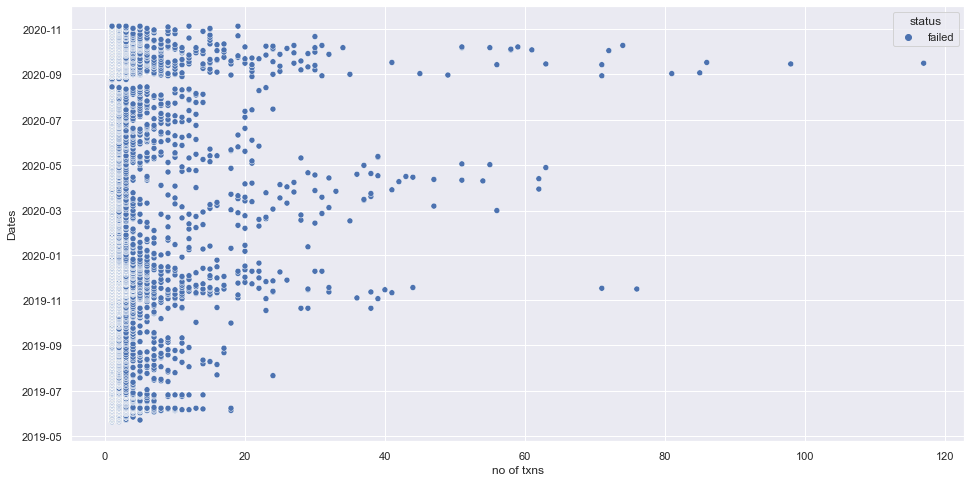

In [285]:
# ypoints = sorted_daily_metric['no of txns']

# plt.plot(sorted_daily_metric.index, ypoints, linestyle = 'dotted')


# plt.show()
plt.figure(figsize=(16,8))
sns.scatterplot(data=failed_txn_data, y="Dates", x="no of txns", hue='status')


# Insight:

## There were increased Failed transactions September and October 2020;

## --- Triger =  EndSars Protest


## There was also a spike of failed Transactions on March 2020;

## ---  Triger =  COVID-19 pandemic Lockdown

# Thank You.  

# Presentation by Anichebe Obumneme